In [2]:
import pandas as pd 
import numpy as np

data = pd.read_csv(r"F:\M.Tech_CollgeMaterials\IronCode\PredictingWineQT\dataset\WineQT.csv")

In [3]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
data = data.drop(['Id'],axis=1)

In [10]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop(['quality'],axis=1)   # Dropping quality since we are predicting quality 
y = data['quality']                 # Taking quality in y variable 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# Data Transformation using Standard Scalar 

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [33]:
# Performing Principal component analysis on the Standardized data from standard scalar 
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)
print("Transformed Data:")
print(data_pca)


Transformed Data:
[[-1.56154478  0.44489171 -1.76720916 ... -0.01154807 -0.24961113
   0.04646536]
 [-0.76089236  1.91505819 -0.8641578  ...  0.54764364  0.00519571
  -0.13480993]
 [-0.70808539  0.91442316 -1.14236292 ...  0.08411791 -0.20371481
  -0.12255325]
 ...
 [-2.12463519  0.87380431  0.62657264 ...  1.00809106  0.29669087
  -0.03392999]
 [-2.20853569  0.92834262  1.815403   ...  1.15057722  0.43650587
  -0.21540191]
 [-2.24173343  1.00318928  0.65088927 ...  0.70794013  0.74328967
   0.07136774]]


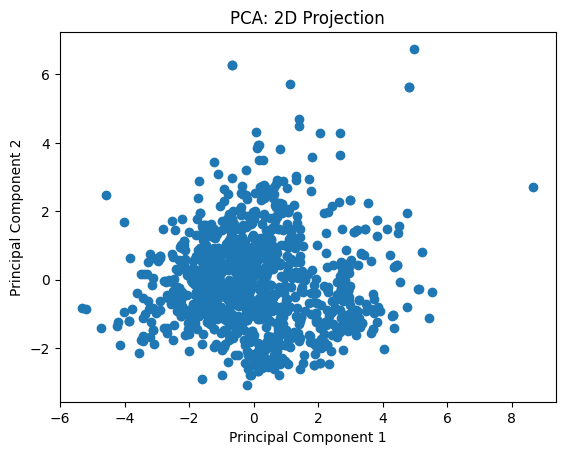

In [47]:
import matplotlib.pyplot as plt

plt.scatter(data_pca[:, 0], data_pca[:, 1]) 

plt.title('PCA: 2D Projection')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.show()
# In PCA (Principal Component Analysis), the principal components are derived from your non-target columns, which are the features in our dataset.

In [49]:
# Finding the Explained variance Ratio
# The explained variance ratio in PCA indicates the proportion of the total variance in the data that is captured by each of the principal components.

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio by each component:", explained_variance_ratio)
print("Cumulative Explained Variance:", np.cumsum(explained_variance_ratio))


Explained Variance Ratio by each component: [0.28692345 0.17075104 0.14305928 0.1101368  0.08711032 0.06048811
 0.05069067 0.03809625 0.03131763 0.01611195 0.0053145 ]
Cumulative Explained Variance: [0.28692345 0.45767448 0.60073377 0.71087056 0.79798089 0.85846899
 0.90915967 0.94725592 0.97857355 0.9946855  1.        ]


In [ ]:
# Implementing Logistic Regression for Prediction 

from sklearn.linear_model import LogisticRegression
